In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [28]:
data=pd.read_csv("D:/customer_churn_dataset.csv")
df=pd.DataFrame(data)
df



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
# INSPCTING DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
# HERE COLUMN 'TOTAL_CHARGES' IS IN STR. FORMAT BUT IT IS INT.COLUMN SO WE CONVERT IT into float.
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
df['TotalCharges']=df['TotalCharges'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# NOW IT IS IN FLOAT FORMAT----------

In [31]:
# HANDELING NULL VALUES-----------------------------
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# data has no null values


In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
df.duplicated().sum()

np.int64(0)

# there is no any duplicated reocord

In [34]:
#  'SeniorCitizen' column are in int(64) but we want it inyo object so we convert it into object.
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
        
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)    

# either use above or either use below --------------------------

# df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'yes' if x == 1 else 'no' if x == 0 else x)
df['SeniorCitizen']

0        no
1        no
2        no
3        no
4        no
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: SeniorCitizen, Length: 7043, dtype: object

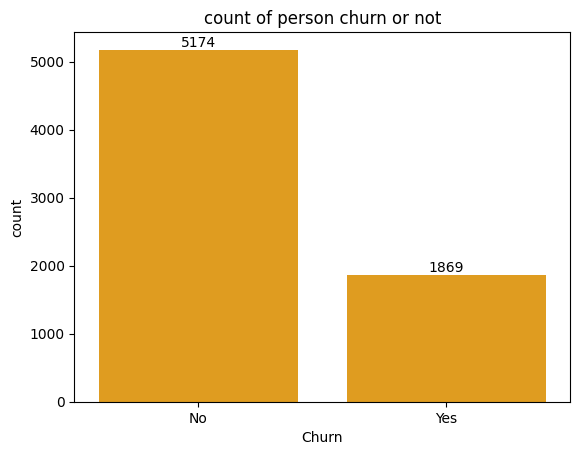

In [42]:
# to count the people how many churn or not

ax=sns.countplot(data=df,x='Churn',color='orange')
ax.bar_label(ax.containers[0])
plt.title('count of person churn or not')
plt.show()


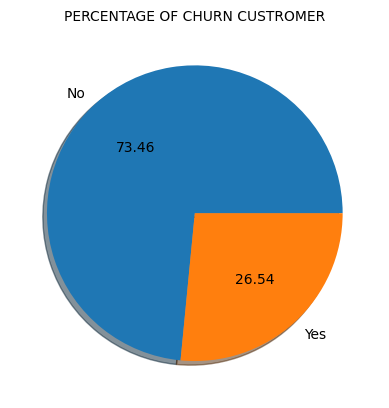

In [66]:
# in percentage the churn data----------
data=df.groupby('Churn')['Churn'].count()
data
plt.pie(data.values,labels=data.index,autopct="%1.2f",shadow=True)
plt.title("PERCENTAGE OF CHURN CUSTROMER",fontsize=10)
plt.show()

# FROM THE GIVEN PIE CHART WE CAN CONCLUDE THAT 26.54% OF PEOPLE CHURNED OUT NOW LETS CONCLUDE/EXPLORE THE REASON BEHIND IT.

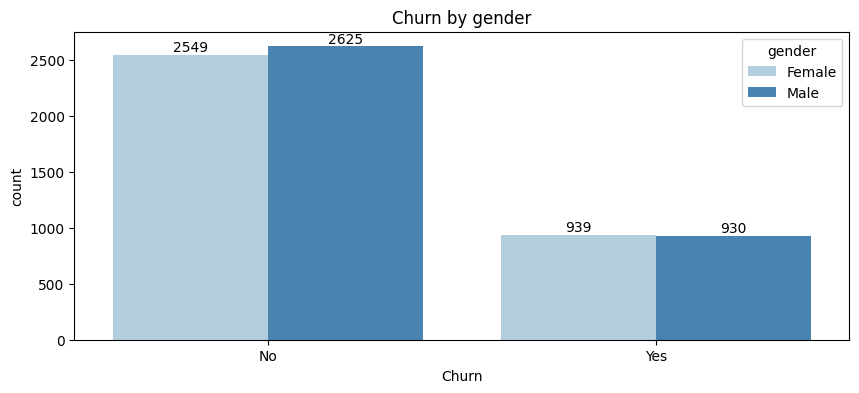

In [87]:
# NOW LETS CHECK ON THE BASIS OF GENDER-----------------------
plt.figure(figsize=[10,4])
ax=sns.countplot(data=df,x='Churn',hue='gender',palette='Blues')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn by gender')
plt.show()

# THEIR IS NO LARGE DIFFERNECE  IN CHURN ON THE BEHALF OF GENDER, BOT ARE APPROXIMATE EQUALY.

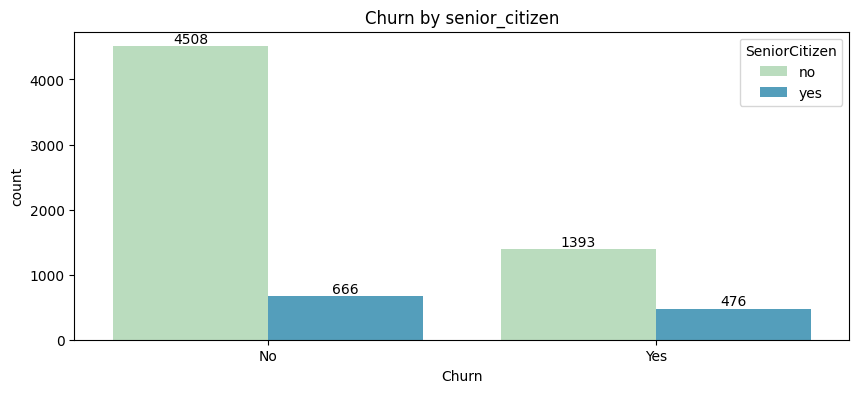

In [90]:
# ON THE BEHALF OF AGE OR WE CAN SAY ON 'SENIOR_CITIZEN'----------
plt.figure(figsize=[10,4])
ax=sns.countplot(data=df,x='Churn',hue='SeniorCitizen',palette='GnBu')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by senior_citizen")
plt.show()

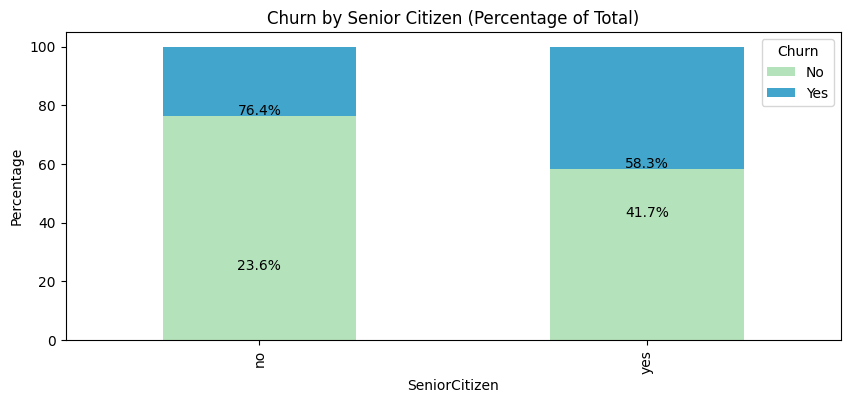

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each combination of 'Churn' and 'SeniorCitizen'
count_data = df.groupby(['Churn', 'SeniorCitizen']).size().unstack().T

# Calculate the percentages
count_data_percentage = count_data.divide(count_data.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
ax = count_data_percentage.plot(kind='bar', stacked=True, figsize=[10, 4], color=sns.color_palette('GnBu', 2))

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height() - 0.5), 
                    ha='center', va='bottom', color='black')

plt.title("Churn by Senior Citizen (Percentage of Total)")
plt.ylabel("Percentage")
plt.show()


# FOUND TO BE A LARGE PERCENTAGE OF PEOPLE OF SENIOR CITIZEN WERE CHURNED OUT AS COMPARE TO OTHERS

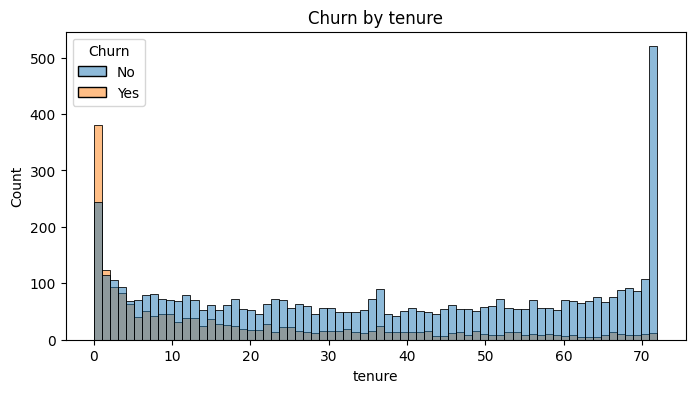

In [113]:
#ON THE BEHALF OF 'TENURE'--------------------------
plt.figure(figsize=[8,4])
ax=sns.histplot(data=df,x='tenure',hue='Churn',bins=70)
plt.title('Churn by tenure')
plt.show()


# PEOPLE WHO HAVE USED OUR SERVICES FOR A LONG TIM HAVE STAYED AND PEOPLE WHO HAVE USED OUR SERVICES  FOR 1 OR2 MONTHS HAVE CHURNED. 

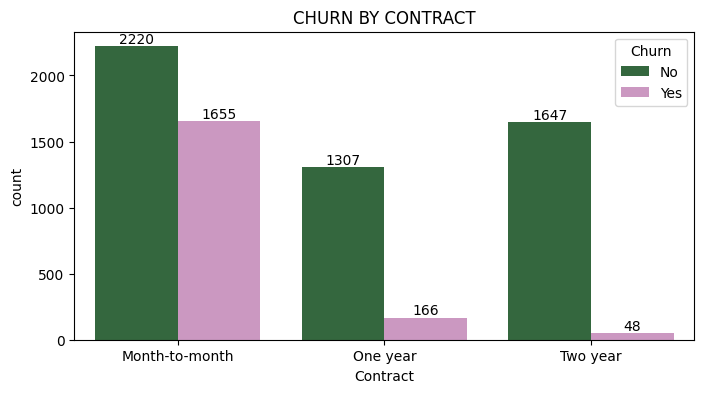

In [122]:
# ON THE BASIS OF CONTRACTS------------------
plt.figure(figsize=[8,4])
ax=sns.countplot(data=df,x='Contract',hue='Churn',palette='cubehelix')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('CHURN BY CONTRACT')
plt.show()

# PEOPLE WHO HAVE MONTH TO MONTH CONTRACT ARE LIKELY TO CHURN THEN FROM THOSE WHO HAVE 1 OR 2 YEAR OF CONTRACT.

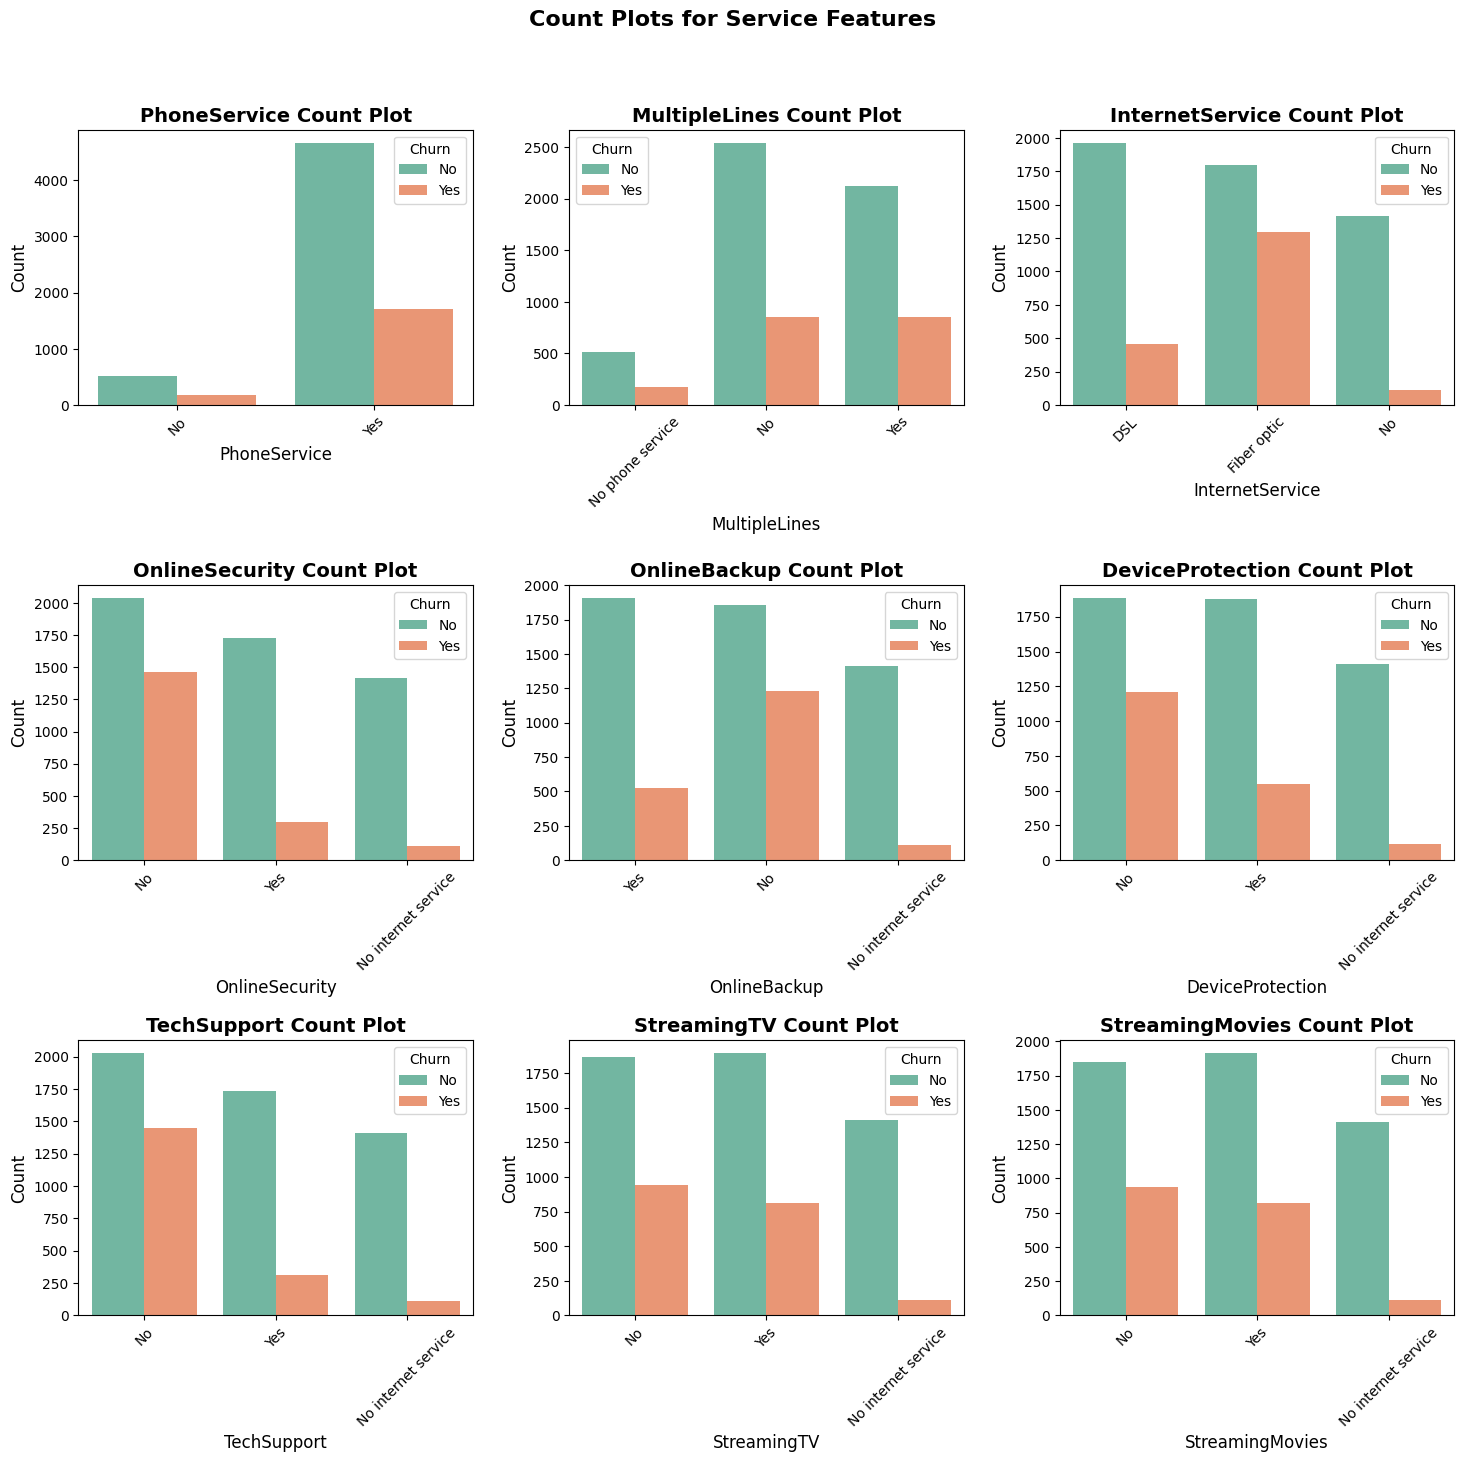

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to create count plots for
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set the number of columns in the grid
n_cols = 3  # Number of columns per row (adjust as needed)
n_rows = (len(columns) // n_cols) + (1 if len(columns) % n_cols else 0)  # Calculate rows required

# Create the subplots grid with clear spacing
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and create a count plot
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2',hue='Churn')  # Choose a palette you prefer
    axes[i].set_title(f'{column} Count Plot', fontsize=14, fontweight='bold')  # Title with styling
    axes[i].set_xlabel(column, fontsize=12)  # X-axis label
    axes[i].set_ylabel('Count', fontsize=12)  # Y-axis label
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity

# Hide any unused subplots if the number of columns is not a perfect grid
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide the axes for empty subplots

# Add a title for the entire figure
plt.suptitle('Count Plots for Service Features', fontsize=16, fontweight='bold')

# Adjust layout for better spacing and to avoid overlap
plt.tight_layout(pad=2.0)  # Padding for better spacing between subplots

# Adjust the title to not overlap with the subplots
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


# THE MAJORITY OF CUSTOMER WHO DO NOT CHURN TO TEND TO HAVE SERVICE LIKE PHONE SERVICE INTERNET SERIVICES, AND ONLINE SECURITY ENABLED ONLINE BACKUP TECH-SUPPORT ,STREAMING-TV, CHURN RATE,NOTICIBLY HIGHERWHEN THESE SERVICES ARE NOT IN USED OR ARE UNAVAILABLE.

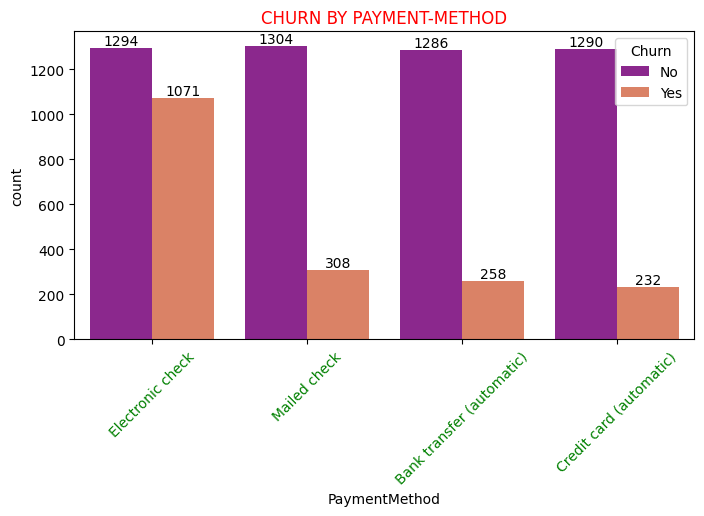

In [158]:
# ON THE BEHALF OF PAYMENT METHOD ------------
plt.figure(figsize=[8,4])
ax=sns.countplot(data=df,x='PaymentMethod',hue='Churn',palette='plasma')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('CHURN BY PAYMENT-METHOD',color='red')
plt.xticks(rotation=45,color='green')
plt.show()

# CUSROMER ARE LIKELY TO CHURN WHEN THE ARE USING 'ELECTRONIC CHECK' AS A PAYMENT